# Installing Natural PDF

There are a LOT of possible extras (a lot of them AI-flavored) inside of Natural PDF, but we'll start by just installing the basics. You use `"natural_pdf[all]"` if you want *everything*.

# Opening a PDF

**We'll start by opening a PDF.**

You can use a PDF on your own computer, or you can use one from a URL. I'll start by using one from a URL to make everything a bit easier.

In [3]:
from natural_pdf import PDF

pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")
pdf

<PDF source='https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf' pages=1>

You can find the pages of the pdf under `pdf.pages`, let's grab the first one.

In [4]:
page = pdf.pages[0]
page

<Page number=1 index=0>

Pretty boring so far, eh? Let's take a look at the page itself.

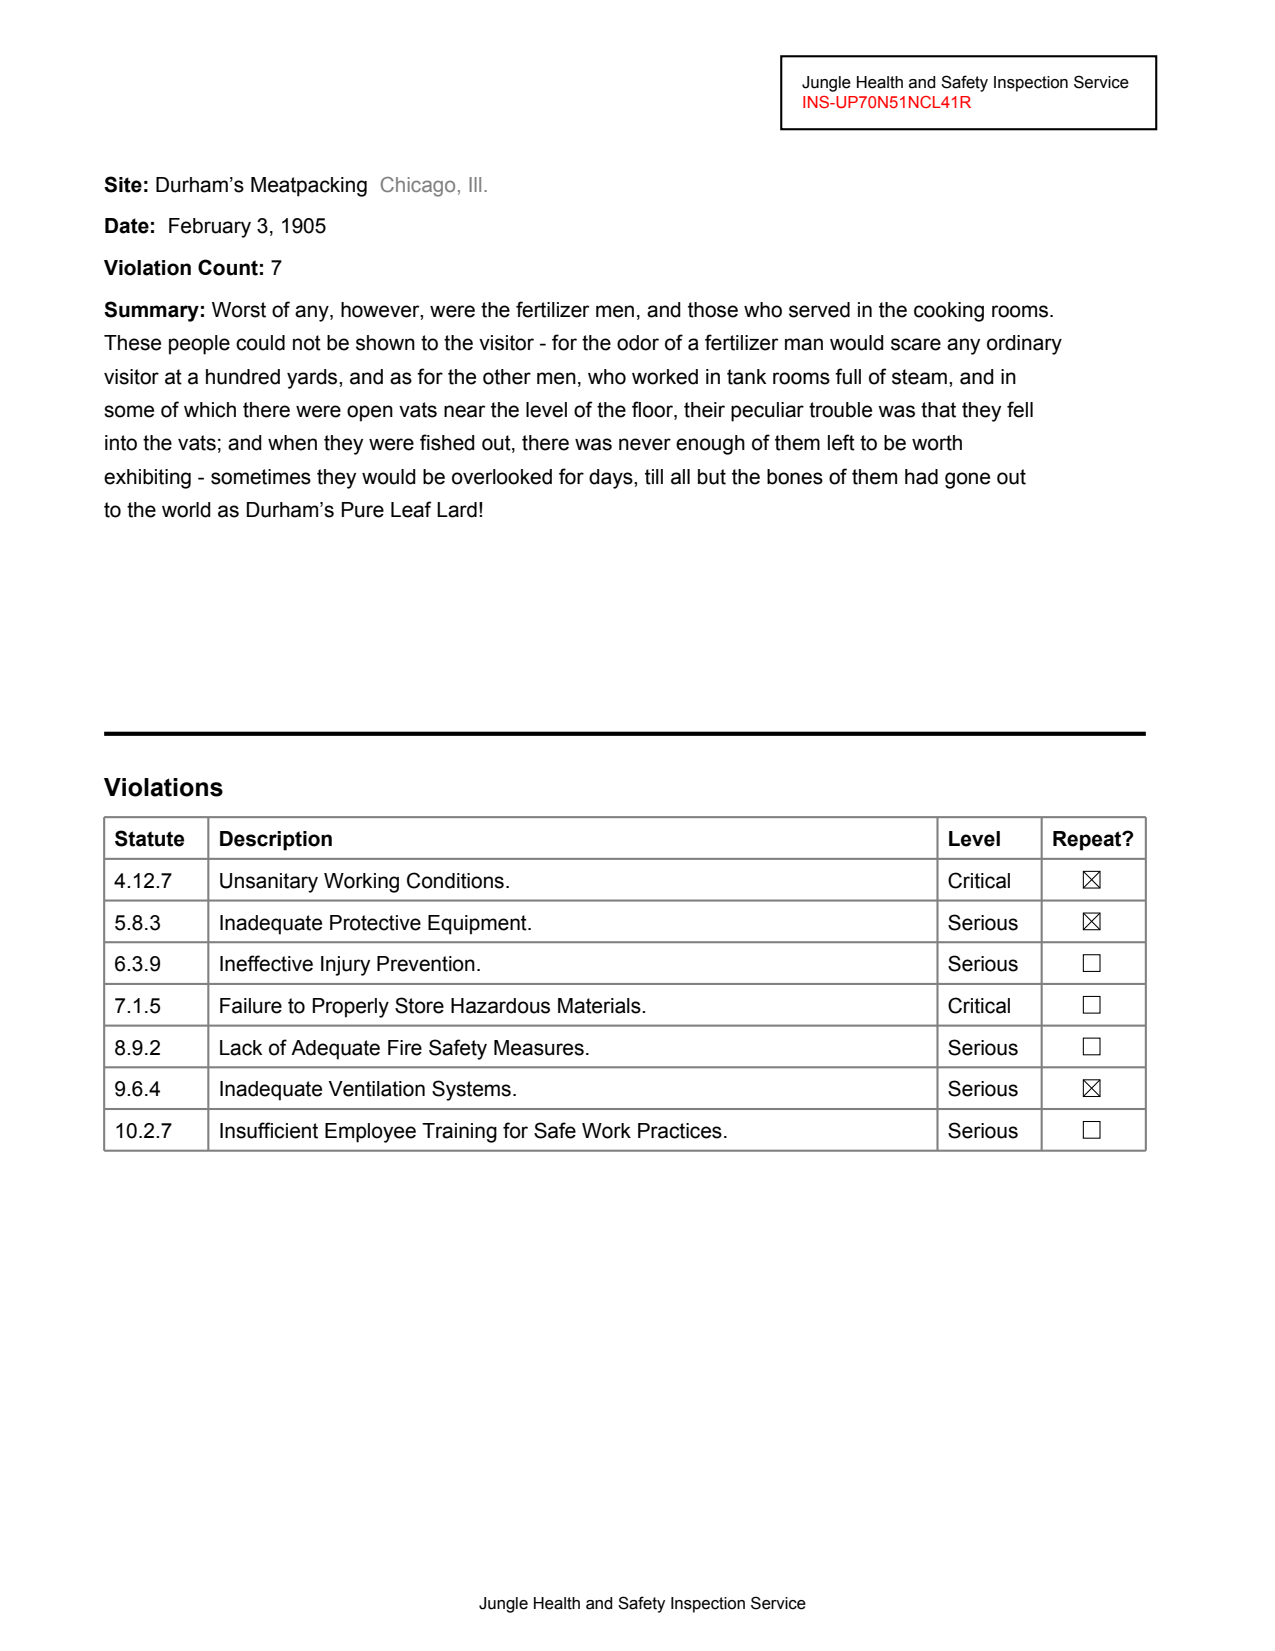

In [5]:
page.show()

Incredible!!! Congratulations, you've opened your first PDF with Natural PDF.

# Grabbing page text

Most of the time when we're working with PDFs you're interested in the text on the page.

In [6]:
# text = page.extract_text()
text = page.extract_text(layout=True)
# text
print(text)

                                                                                    
                                                                                    
                                                                                    
                                                     Jungle Health and Safety Inspection Service
                                                     INS-UP70N51NCL41R              
                                                                                    
       Site: Durham’s Meatpacking Chicago, Ill.                                     
                                                                                    
       Date: February 3, 1905                                                       
                                                                                    
       Violation Count: 7                                                           
       Summary: Worst of any, however, were the ferti

`layout=True` is a useful addition if you want to see a text-only representation of the page, and sometimes it helps with data extraction.

# Selecting elements and grabbing specific text

You rarely want all of the text, though. How would you describe the **INS-UP70N51NCL41R** text?

- It's in a box
- It's the second text on a page
- It's red
- It starts with "INS"

## Selecting objects: "It's in the box"

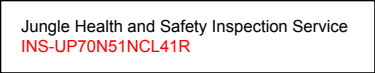

In [7]:
# page.find('rect')
# page.find('rect').show()
page.find('rect').show(crop=True)

In [8]:
text = page.find('rect').extract_text()
print(text)

Jungle Health and Safety Inspection Service
INS-UP70N51NCL41R


### Selecting multiple objects: "It's the second piece of text"

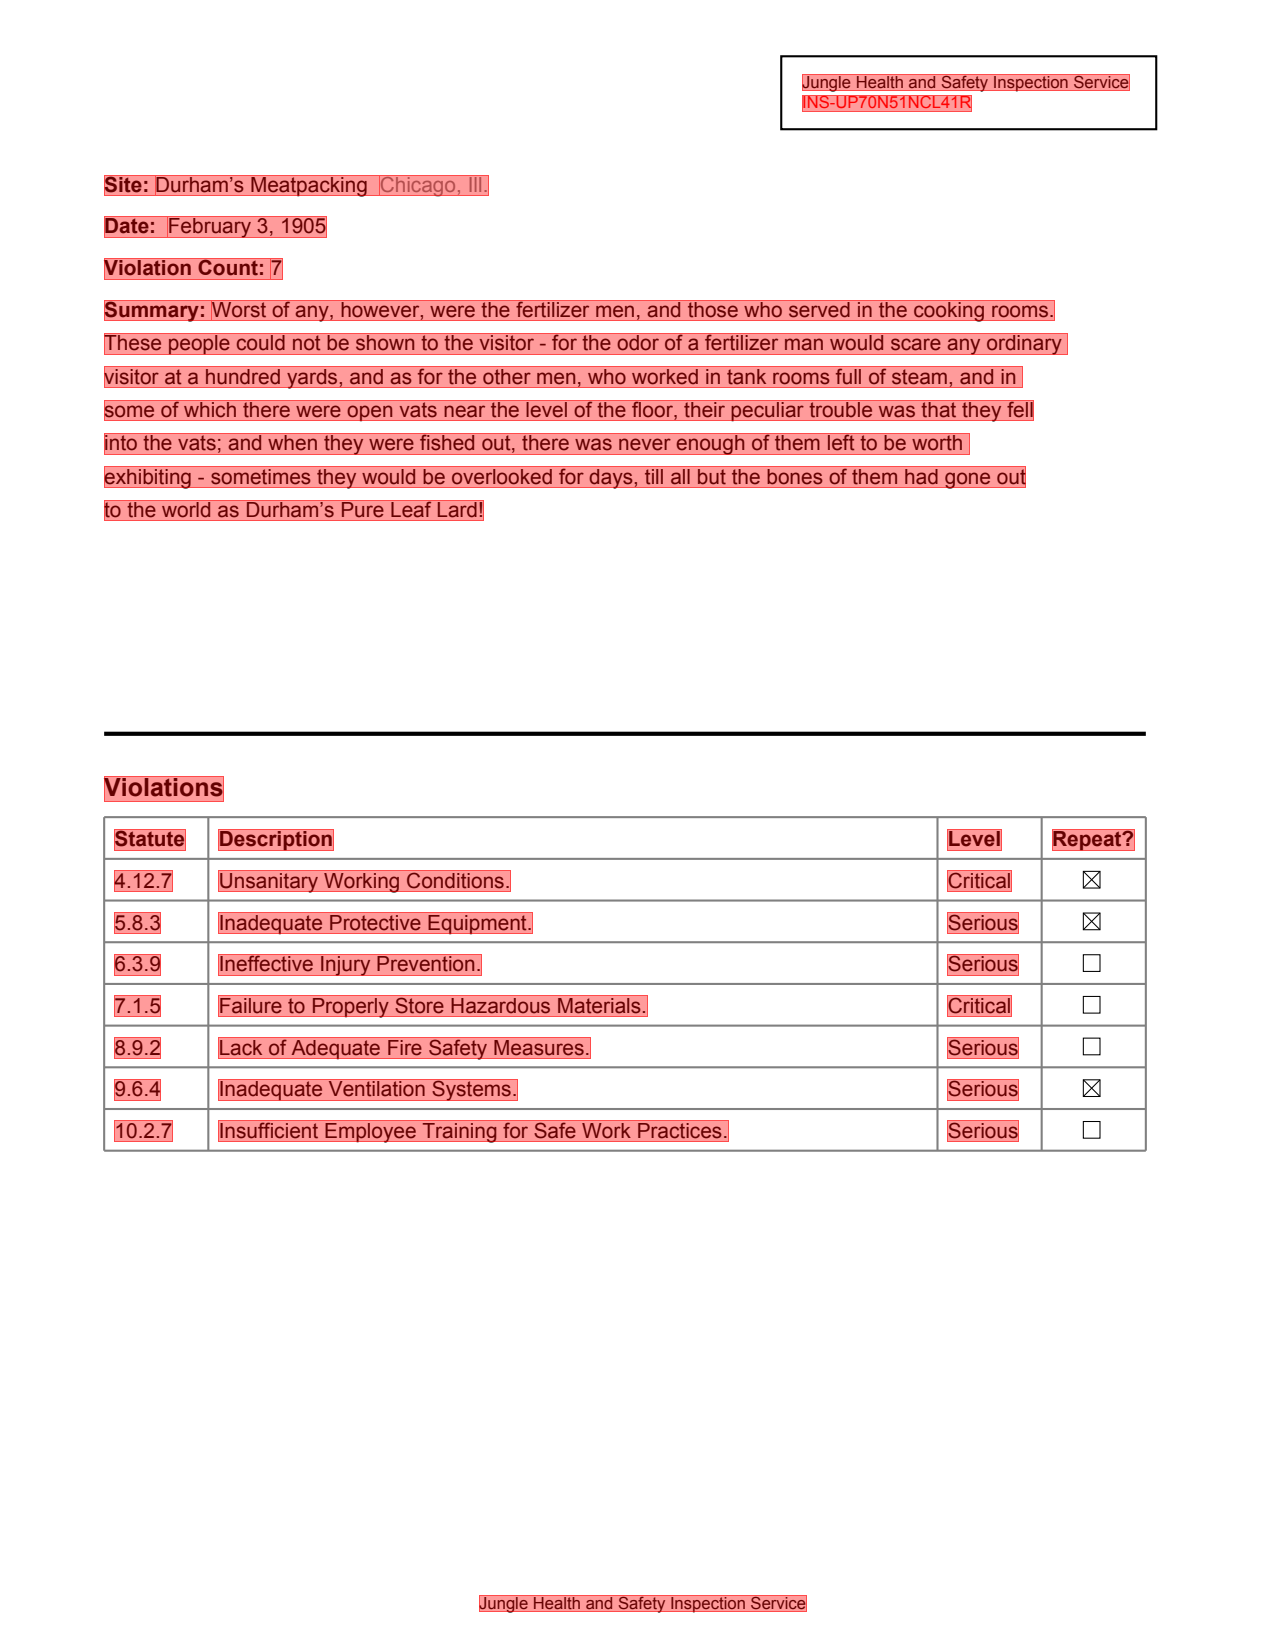

In [9]:
page.find_all('text').show()

In [10]:
texts = page.find_all('text').extract_each_text()

texts[:5]

['Jungle Health and Safety Inspection Service',
 'INS-UP70N51NCL41R',
 'Site:',
 'Durham’s Meatpacking',
 'Chicago, Ill.']

In [11]:
texts[1]

'INS-UP70N51NCL41R'

### Finding by attributes: "It's the red text"

In [12]:
red_text = page.find('text[color~=red]')
red_text.show(crop=True)

In [13]:
red_text.extract_text()

'INS-UP70N51NCL41R'

## Searching by text: "It starts with INS-"

In [14]:
text = page.find('text:contains("INS-")')
# text = page.find('text:starts-with("INS-")')
text.show(crop=True)

In [15]:
text.extract_text()

'INS-UP70N51NCL41R'

What about "Chicago, Ill."? It's grey, so...

In [16]:
page.find("text[color~=grey]")

<TextElement text='Chicago, I...' font='Helvetica' size=10.0 bbox=(182.26000000000002, 84.07000000000005, 234.50000000000003, 94.07000000000005)>

# Learning about the page

How do we know what's on the page? `page.describe()` can help!

In [22]:
page.describe()

## Page 1 Summary

**Elements**:

- **text**: 44 elements
- **line**: 21 elements
- **rect**: 8 elements

**Text Analysis**:

- **typography**:
  - **fonts**:
    - Helvetica: 44
  - **sizes**:
    - 10.0pt: 40
    - 8.0pt: 3
    - 12.0pt: 1
  - styles: 9 bold
  - **colors**:
    - black: 42
    - other: 2

In [23]:
page.find_all('text').inspect()

text,x0,top,x1,bottom,font_family,font_variant,size,styles,source,confidence,color
Jungle Health and Safety Inspection Service,385,36,542,44,Helvetica,,8,,native,1.00,#000000
INS-UP70N51NCL41R,385,46,466,54,Helvetica,,8,,native,1.00,#ff0000
Site:,50,84,74,94,Helvetica,,10,bold,native,1.00,#000000
Durham’s Meatpacking,74,84,182,94,Helvetica,,10,,native,1.00,#000000
"Chicago, Ill.",182,84,235,94,Helvetica,,10,,native,1.00,#7f7f7f
Date:,50,104,81,114,Helvetica,,10,bold,native,1.00,#000000
"February 3, 1905",81,104,157,114,Helvetica,,10,,native,1.00,#000000
Violation Count:,50,124,130,134,Helvetica,,10,bold,native,1.00,#000000
7,130,124,136,134,Helvetica,,10,,native,1.00,#000000
Summary:,50,144,102,154,Helvetica,,10,bold,native,1.00,#000000


Let's find the **largest text** that's also Helvetica

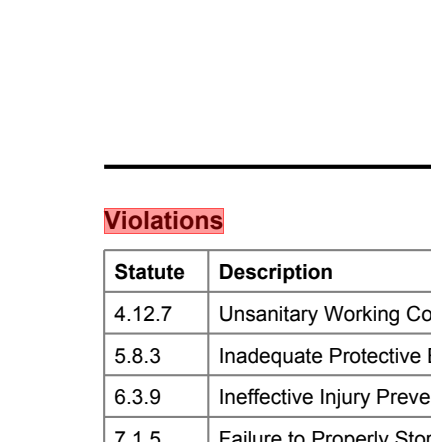

In [27]:
page.find_all('text[size=max()][font_family=Helvetica]').show(crop=100)

## Spatial navigation

What else is on the page that we can extract? How about the **date?** We want to find **Date:** and grab everything to the right of it.

In [28]:
# page.find(text="Date").show()
page.find(text="Date").right(height='element').extract_text()

'February 3, 1905'

And the **site?** We want to grab 'site', then keep going right until we see a piece of text.

In [39]:
site = (
    page
    .find(text="Site")
    .right(height='element', until='text')
)
# site.show(crop=True)
site.endpoint.extract_text()

'Durham’s Meatpacking'

How about **Violation Count?**

In [41]:
(
    page
    .find(text="Violation Count")
    .right(height='element')
    .extract_text()
)

'7'

The **Summary** is a little bit more difficult. How would you describe where it is?

In [42]:
(
    page
    .find(text="Summary")
    .right(height='element')
    .extract_text()
)

'Worst of any, however, were the fertilizer men, and those who served in the cooking rooms.'

In [53]:
summary = (
    page
    .find(text="Summary")
    .expand(bottom='line', right=True, left=True)
)
summary = (
    page
    .find(text="Summary")
    .below(until='line', include_source=True)
)

# summary.show()
# summary.extract_text(newlines=False)
summary.extract_text(newlines=False)

'Summary: Worst of any, however, were the fertilizer men, and those who served in the cooking rooms. These people could not be shown to the visitor - for the odor of a fertilizer man would scare any ordinary visitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in some of which there were open vats near the level of the floor, their peculiar trouble was that they fell into the vats; and when they were fished out, there was never enough of them left to be worth exhibiting - sometimes they would be overlooked for days, till all but the bones of them had gone out to the world as Durham’s Pure Leaf Lard!'

## Grabbing tables

Everyone loves extracting tables from PDFs! You can do that here: just do `page.extract_table()`. Easy!!!

In [54]:
table = page.extract_table()
table

TableResult(rows=8…)

In [55]:
table.to_df()

,Statute,Description,Level,Repeat?
0,4.12.7,Unsanitary Working Conditions.,Critical,<NA>
1,5.8.3,Inadequate Protective Equipment.,Serious,<NA>
2,6.3.9,Ineffective Injury Prevention.,Serious,<NA>
3,7.1.5,Failure to Properly Store Hazardous Materials.,Critical,<NA>
4,8.9.2,Lack of Adequate Fire Safety Measures.,Serious,<NA>
5,9.6.4,Inadequate Ventilation Systems.,Serious,<NA>
6,10.2.7,Insufficient Employee Training for Safe Work P...,Serious,<NA>


What about a page with **multiple tables?**

In most PDF processing libraries you just say, "give me all of the tables!" and then figure out which one you want. In Natural PDF, the _proper_ way to do it is find the area you know the table is in and extract it alone. 

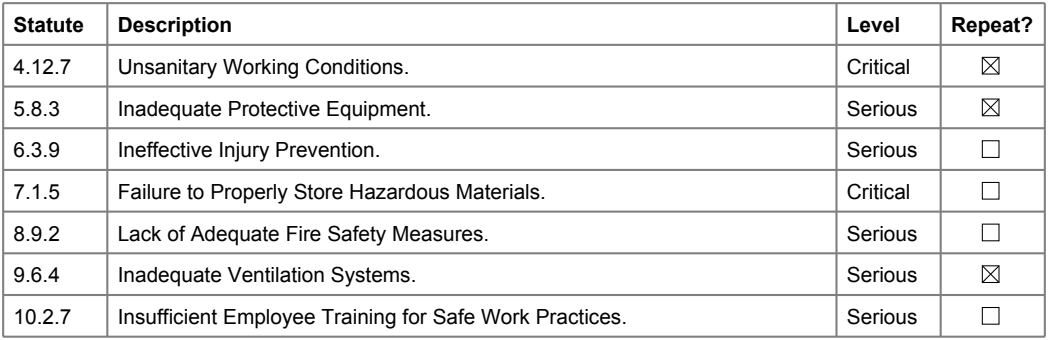

In [64]:
# Start from the bold, big text that says "Violations" and header down to the smallest text
(
    page.find('text[size=max()]:bold:contains("Violations")').below(
        until='text[size=min()]',
        include_endpoint=False
    )
    .trim()
).show(crop=True)

In [65]:
# Start from the bold, big text that says "Violations" and header down to the smallest text
(
    page.find('text[size=max()]:bold:contains("Violations")').below(
        until='text[size=min()]',
        include_endpoint=False
    )
    .trim()
).extract_table().to_df()

,Statute,Description,Level,Repeat?
0,4.12.7,Unsanitary Working Conditions.,Critical,<NA>
1,5.8.3,Inadequate Protective Equipment.,Serious,<NA>
2,6.3.9,Ineffective Injury Prevention.,Serious,<NA>
3,7.1.5,Failure to Properly Store Hazardous Materials.,Critical,<NA>
4,8.9.2,Lack of Adequate Fire Safety Measures.,Serious,<NA>
5,9.6.4,Inadequate Ventilation Systems.,Serious,<NA>
6,10.2.7,Insufficient Employee Training for Safe Work P...,Serious,<NA>


# Ignoring text with exclusion zones

What if we have like two hundred of these forms, and they all look the same, and all we want is the top, text-y part?

Instead of writing code about what we *want*, we can also write code about what we *don't want*. These are called [**exclusion zones**](https://jsoma.github.io/natural-pdf/tutorials/05-excluding-content/).

In [67]:
from natural_pdf import PDF

pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")
page = pdf.pages[0]

In [68]:
text = page.extract_text()
print(text)

Jungle Health and Safety Inspection Service
INS-UP70N51NCL41R
Site: Durham’s Meatpacking Chicago, Ill.
Date: February 3, 1905
Violation Count: 7
Summary: Worst of any, however, were the fertilizer men, and those who served in the cooking rooms.
These people could not be shown to the visitor - for the odor of a fertilizer man would scare any ordinary
visitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in
some of which there were open vats near the level of the floor, their peculiar trouble was that they fell
into the vats; and when they were fished out, there was never enough of them left to be worth
exhibiting - sometimes they would be overlooked for days, till all but the bones of them had gone out
to the world as Durham’s Pure Leaf Lard!
Violations
Statute Description Level Repeat?
4.12.7 Unsanitary Working Conditions. Critical
5.8.3 Inadequate Protective Equipment. Serious
6.3.9 Ineffective Injury Prevention. Serious
7.1.5 Failure to Pro

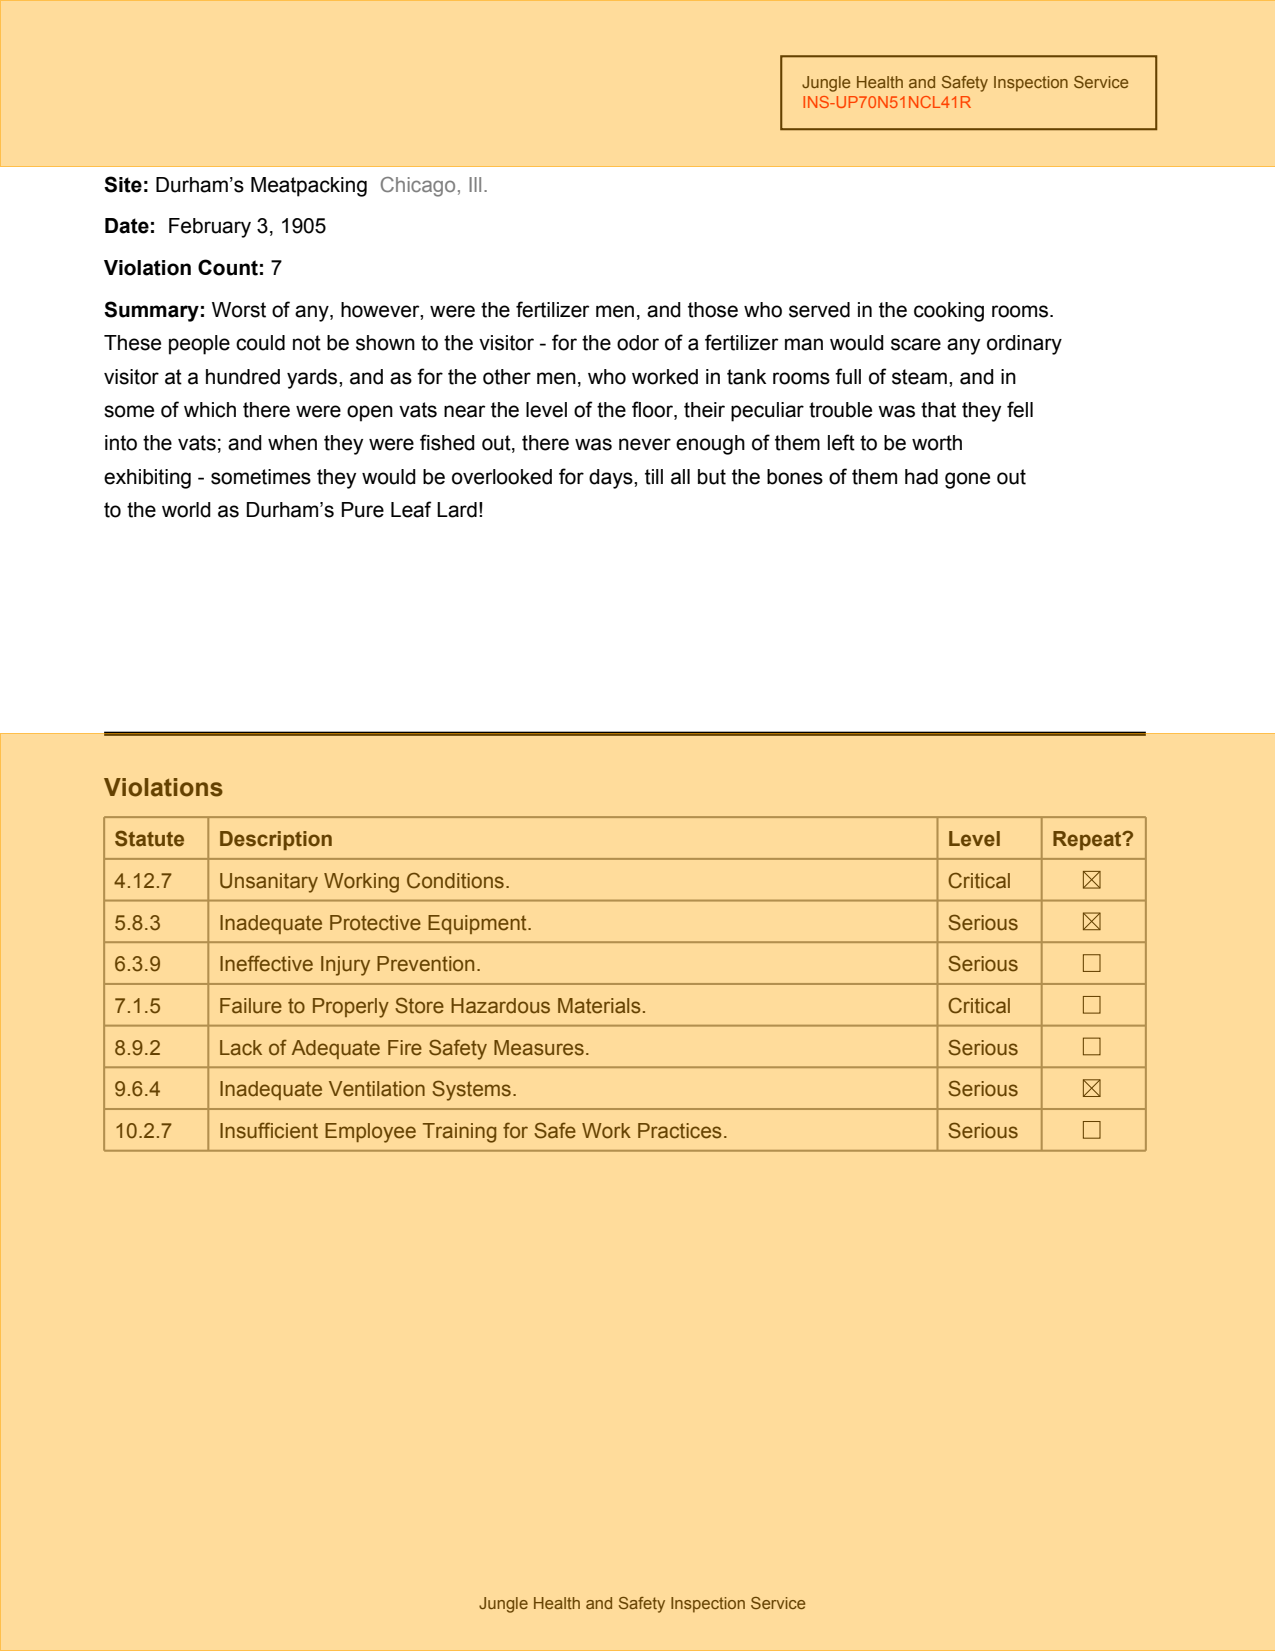

In [69]:
top = page.region(top=0, left=0, height=80)
bottom = page.find("line[width>=2]").below()
(top + bottom).show()

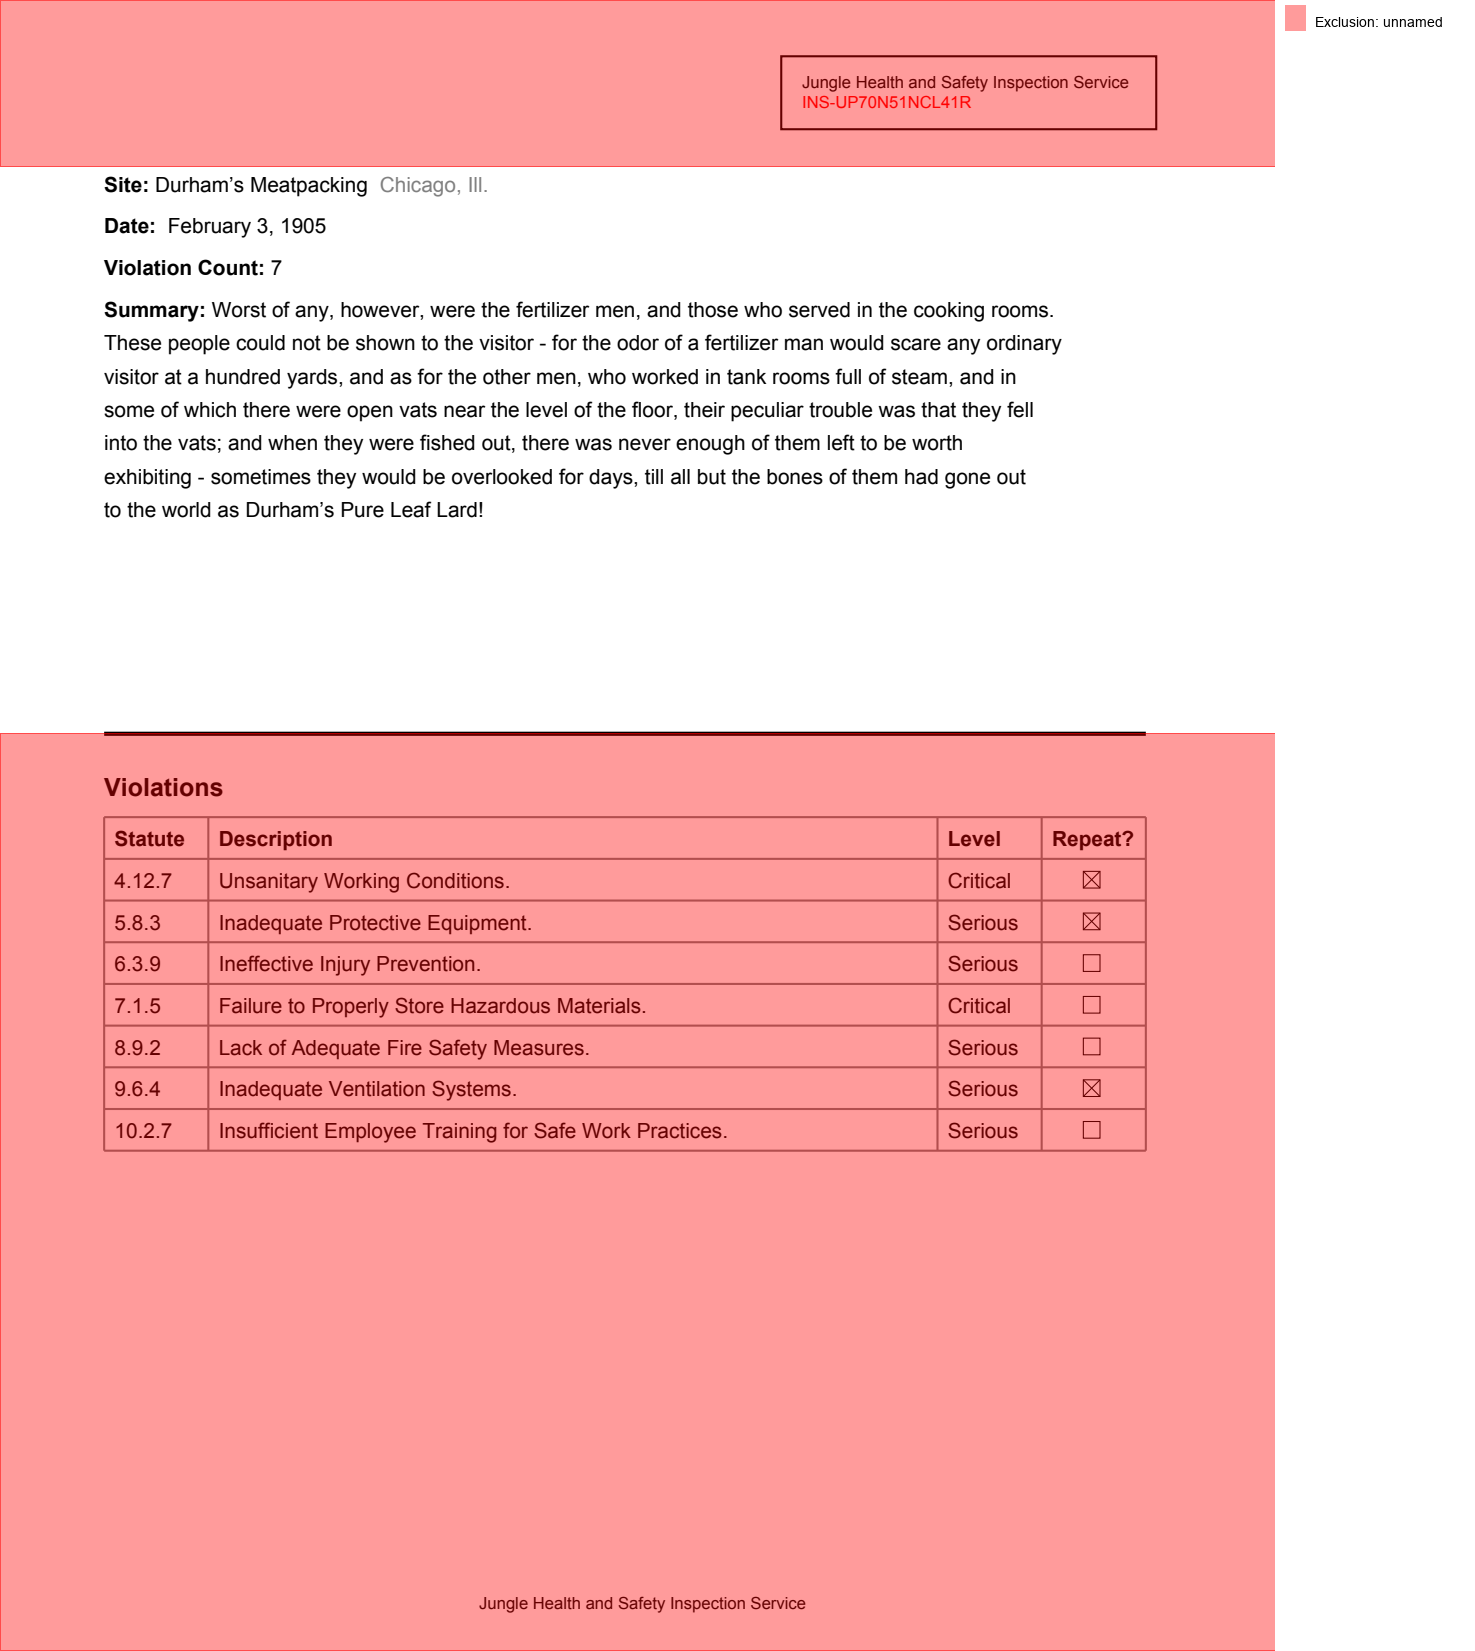

In [71]:
page.add_exclusion(top)
page.add_exclusion(bottom)

page.show(exclusions='red')

In [72]:
text = page.extract_text()
print(text)

Site: Durham’s Meatpacking Chicago, Ill.
Date: February 3, 1905
Violation Count: 7
Summary: Worst of any, however, were the fertilizer men, and those who served in the cooking rooms.
These people could not be shown to the visitor - for the odor of a fertilizer man would scare any ordinary
visitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in
some of which there were open vats near the level of the floor, their peculiar trouble was that they fell
into the vats; and when they were fished out, there was never enough of them left to be worth
exhibiting - sometimes they would be overlooked for days, till all but the bones of them had gone out
to the world as Durham’s Pure Leaf Lard!


Any time there is recurring text - headers, footers, even *stamps on the page you want to ignore*, you can just add them as an exclusion. 

It's also possible to add exclusions across *multiple pages*. In the example below, every time you load a new page up it applies the PDF-level exclusion on it. Write it once, be done with it forever!

In [73]:
pdf.add_exclusion(lambda page: page.region(top=0, left=0, height=80))
pdf.add_exclusion(lambda page: page.find("line[width>=2]").below())

<PDF source='https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf' pages=1>

## Next steps

What about **when the text isn't so easy to access?** Time to move on to our next notebook!